In [174]:
import json
import dateutil
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import timezone

In [278]:
class LogEntry:
    def __init__(self, raw_string):
        parts = raw_string.split('\t')
        self.time = dateutil.parser.parse(parts[0])
        self.level = parts[1]
        self.code_location = parts[2]
        self.msg = parts[3]
        self.json = json.loads(parts[4])
        
        
    def __repr__(self):
        return "%s %s\t%s" % (self.time.strftime("%X"), self.msg, self.json)
    
    def isWrite(self):
        return self.msg == "wrote log item to database"

In [266]:
class LogServer:
    def __init__(self, location):
        self.logs = []
        with open(location) as f:
            for line in f:
                parts = line.split('\t')
                if len(parts) < 4:
                    continue
                self.logs.append(LogEntry(line))
        self.identity = self.logs[0].json["selfAddr"]
        
    

In [267]:
class SingleWriterLog:
    def __init__(self, line):
        logData = eval(line)
        self.hash = logData['record_hash']
        self.timestamp = dateutil.parser.parse(logData['timestamp'])
    def __str__(self):
        return "(%s, %s)" % (self.hash, self.timestamp)

Look at all log writes in all log servers. Record the timestamp of the last write.

In [367]:
logfile_location =  "../benchmark/saved_results/%s.log"
logServers = [LogServer(logfile_location % id) for id in range(3)]

In [368]:
writeTimestamps = {}
for logServer in logServers:
    for log in logServer.logs:
        if log.isWrite():
            logHash = log.json['hash']
            if logHash not in writeTimestamps:
                writeTimestamps[logHash] = [log.time]
            else:
                writeTimestamps[logHash].append(log.time)

For each log written, calculate the time it took to reach all

In [369]:
# orderedLogs is the logs of the single writer
orderedLogs = []

with open("../benchmark/saved_results/writer.log") as f:
    for index, line in enumerate(f):
        if index % 2 == 0:
            continue
        orderedLogs.append(SingleWriterLog(line))
print(len(orderedLogs))

249


In [370]:
# how long full replication took for each log
timeToFullReplication = []
for log in orderedLogs:
    if log.hash not in writeTimestamps:
        print(log.hash)
        continue
    writeTimestamp = writeTimestamps[log.hash]
    writeTimestamp.sort()
    
    lastWriteTimestamp = writeTimestamp[-1]
    timeDelta = lastWriteTimestamp - log.timestamp.replace(tzinfo=timezone.utc)
    timeToFullReplication.append(timeDelta.microseconds/1000000)   

# timestamps of when the single write wrote the log
singleWriterTimestamps = [log.timestamp for log in orderedLogs]

3F7E77B8862B6DBDDCF8AB098FA61834879B5D00D3D17445C5E06C56BDB489D3
FE1DD2D322F50ED5CF214ACFD8E645271FFA2B36F7E0A187BB726BB20E555757


In [371]:
len(singleWriterTimestamps)

249

In [372]:
list(range(5))[:-1]

[0, 1, 2, 3]

In [373]:
len(timeToFullReplication)

247

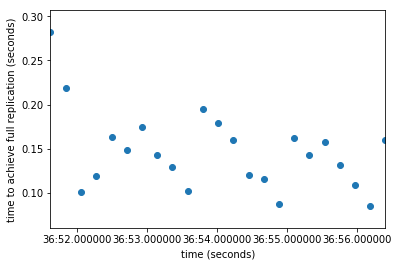

In [382]:
numPoints = 23
x = singleWriterTimestamps[:numPoints]
y = timeToFullReplication[:numPoints]
plt.xlim(x[0], x[numPoints-1])
plt.xlabel("time (seconds)")
plt.ylabel("time to achieve full replication (seconds)")
plt.xticks(None)
plt.scatter(x, y)


    

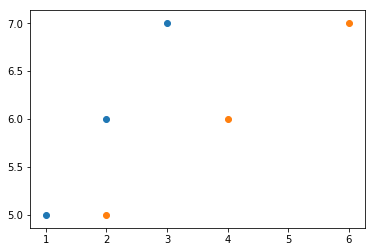

In [179]:
# index refers to the log
x = [1,2,3]
y = [5,6,7]
plt.scatter(x,y)
plt.scatter([2*a for a in x], y)

In [170]:
logs = LogServer('8.log')
for x in logs.logs:
    print(x)

5AF8
19:54:48 Added peer	{'selfAddr': '5AF8', 'gdpAddr': '495D', 'httpAddr': 'localhost:7000'}
19:54:48 scheduling heartbeat	{'selfAddr': '5AF8', 'interval': 4}
19:54:52 sending fanout heart beat	{'selfAddr': '5AF8', 'chosen indices': [0]}
19:54:52 Generate msg 0	{'selfAddr': '5AF8'}
19:54:53 heart beat sent	{'selfAddr': '5AF8', 'dst': '495D', 'msg': {'Type': 0, 'Body': {}}}
19:55:02 received message	{'selfAddr': '5AF8', 'msg': {'Type': 0, 'Body': {}}, 'srcAddr': '495D'}
19:55:02 processing message	{'selfAddr': '5AF8', 'msg': {'Type': 0, 'Body': {}}, 'src': '495D'}
19:55:02 Generate msg 1	{'selfAddr': '5AF8'}
19:55:02 received message	{'selfAddr': '5AF8', 'msg': {'Type': 2, 'Body': {}}, 'srcAddr': '495D'}
19:55:02 processing message	{'selfAddr': '5AF8', 'msg': {'Type': 2, 'Body': {}}, 'src': '495D'}
19:55:02 Generate msg 3	{'selfAddr': '5AF8'}
19:55:06 received message	{'selfAddr': '5AF8', 'msg': {'Type': 0, 'Body': {}}, 'srcAddr': '495D'}
19:55:06 processing message	{'selfAddr': '5AF8

In [186]:
with open("../benchmark/saved_results/0.log") as f:
    for line in f:
        print(line)

2018-12-06T07:15:07.518Z	INFO	gdp-replicate/main.go:55	Added peer	{"selfAddr": "5DBA", "gdpAddr": "A373", "httpAddr": "10.0.0.2:10262"}

2018-12-06T07:15:07.519Z	INFO	gdp-replicate/main.go:55	Added peer	{"selfAddr": "5DBA", "gdpAddr": "500E", "httpAddr": "10.0.0.3:10262"}

2018-12-06T07:15:07.519Z	INFO	daemon/daemon.go:62	starting daemon	{"selfAddr": "5DBA"}

2018-12-06T07:15:07.519Z	INFO	daemon/heartbeat.go:13	scheduling heartbeat	{"selfAddr": "5DBA", "interval": 1}

2018-12-06T07:15:08.520Z	INFO	daemon/heartbeat.go:81	sending fanout heart beat	{"selfAddr": "5DBA", "chosen indices": [0]}

2018-12-06T07:15:08.520Z	INFO	policy/graph_diff_policy.go:154	Generate msg 0	{"selfAddr": "5DBA"}

2018-12-06T07:15:08.520Z	INFO	daemon/heartbeat.go:42	heart beat sent	{"selfAddr": "5DBA", "dst": "500E", "msg": {"Type":0,"Body":{}}}

2018-12-06T07:15:08.590Z	INFO	peers/simple_replicate_mgr.go:70	received message	{"selfAddr": "5DBA", "msg": {"Type":0,"Body":{}}, "srcAddr": "A373"}

2018-12-06T07:15:08


2018-12-06T07:18:44.574Z	INFO	peers/simple_replicate_mgr.go:70	received message	{"selfAddr": "5DBA", "msg": {"Type":0,"Body":{}}, "srcAddr": "500E"}

2018-12-06T07:18:44.574Z	DEBUG	policy/graph_diff_policy.go:163	processing message	{"selfAddr": "5DBA", "msg": {"Type":0,"Body":{}}, "src": "500E"}

2018-12-06T07:18:44.575Z	INFO	policy/graph_diff_policy.go:268	Generate msg 1	{"selfAddr": "5DBA"}

2018-12-06T07:18:44.609Z	INFO	peers/simple_replicate_mgr.go:70	received message	{"selfAddr": "5DBA", "msg": {"Type":1,"Body":{}}, "srcAddr": "500E"}

2018-12-06T07:18:44.609Z	DEBUG	policy/graph_diff_policy.go:163	processing message	{"selfAddr": "5DBA", "msg": {"Type":1,"Body":{}}, "src": "500E"}

2018-12-06T07:18:44.651Z	INFO	policy/graph_diff_policy.go:371	Generate msg 2	{"selfAddr": "5DBA"}

2018-12-06T07:18:44.665Z	INFO	peers/simple_replicate_mgr.go:70	received message	{"selfAddr": "5DBA", "msg": {"Type":2,"Body":{}}, "srcAddr": "A373"}

2018-12-06T07:18:44.666Z	DEBUG	policy/graph_diff_policy